<a href="https://colab.research.google.com/github/StefanThomassen/Economics-Data-Analysis-projects/blob/master/Normality_Checks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Checking for normality of a random distributed data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [61]:
#Simulating 500 none normal datapoints

np.random.seed(10)

data = np.random.randint(-50, 50, 500)


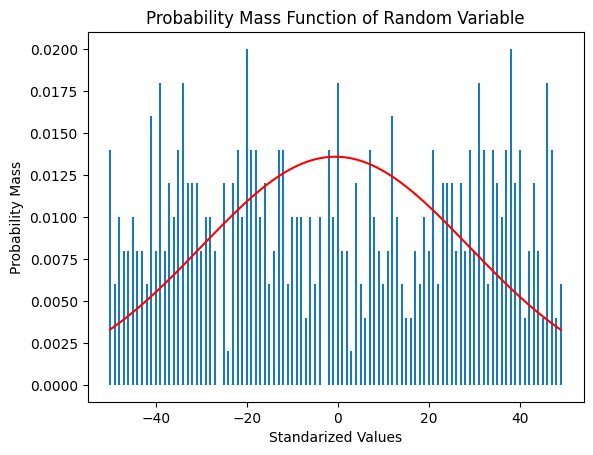

In [62]:
#Standarizing the data to plot a PMF

values, counts = np.unique(data, return_counts=True)
pmf = counts / counts.sum()

#plot PMF and normal distribuition density function in a line

#Generate PDF (Normal distribution for comparison) with same range
x1 = np.linspace(min(values), max(values), 500) #creating normally distributed with same range as data
pdf1 = norm.pdf(x1, loc=np.mean(data), scale=np.std(data))  # creating normal pdf with same mean and std as data for comparison



#Plot both PMF and pdF for comparison
fig, ax = plt.subplots()
ax.stem(values, pmf, basefmt=" ", markerfmt="")
ax.plot(x1, pdf1, label="PDF", color='red')
ax.set_xlabel('Standarized Values')
ax.set_ylabel('Probability Mass')
ax.set_title('Probability Mass Function of Random Variable')
plt.show()

Comparing the data PMF with a normal distribution density function, we can observe the data is not normal. Another way of visualizing this is by observing how the QQ-plot shows that the data's percentiles deviate from the 45-degree line of normal distribution percentiles.

Text(0.5, 1.0, 'QQ Plot - Normal Distribution')

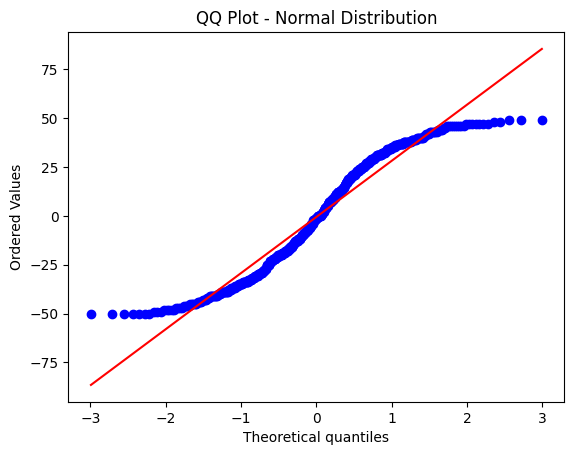

In [63]:
#plotting QQ plot to confirm data is not normally distributed.

plt.close()
fig, axs = plt.subplots()
stats.probplot(data, dist="norm", plot=axs)
axs.set_title('QQ Plot - Normal Distribution')

To confirm the normality of the data, I will run a Shapiro-Wilk Normality Test. This tests the null hypothesis of the data being normally distributed.

In [64]:
# Shapiro Wilk normality test
shapiro_test = stats.shapiro(data)
print(
    "Shapiro W: {0} \nShapiro p-value {1}".format(
        shapiro_test.statistic, shapiro_test.pvalue
    )
)

Shapiro W: 0.9437240985789447 
Shapiro p-value 7.791946828673922e-13


As the P-value is very low, we reject the null hypothesis and thus can confirm that the data is not normally distributed. The Shapiro W is the correlation between the ordered observed data and a theoretically normally distributed dataset. Although the Shapiro W is high, the p-value is more critical in the hypothesis test; thus (together with the visualizations), we can still conclude the data is not normally distributed.